# MackChainladder Backtest

Use the CAS CLRD triangles for fitting while validating against the actual ultimates exported from the original R `reservetestr` package (Glenn Meyers subset).

## Setup

In [1]:
import pandas as pd
import reservetestr as rt

In [2]:
records = rt.build_triangle_records(evaluation_year=1997)
len(records)

200

To experiment with alternative diagonals (e.g., holding out several calendar years), provide a different `evaluation_year`.

In [ ]:
clrd_records = rt.build_triangle_records(evaluation_year=1992)
len(clrd_records)

## Run the Mack back-test

In [3]:
mack_results = rt.run_single_backtest(
    records,
    rt.testr_mack_chainladder,
    lines_to_include=["comauto", "ppauto", "wkcomp", "othliab"],
    loss_type="paid",
    method_label="mack_paid_meyers"
)
mack_results.head()

/Users/atroyer/.local/lib/python3.11/site-packages/chainladder/utils/weighted_regression.py:84: RuntimeWarning: invalid value encountered in sqrt
  residual = (y - fitted_value) * xp.sqrt(w)
/Users/atroyer/.local/lib/python3.11/site-packages/chainladder/development/development.py:174: RuntimeWarning: invalid value encountered in sqrt
  / xp.swapaxes(xp.sqrt(x ** (2 - exponent))[..., 0:1, :], -1, -2)
/Users/atroyer/.local/lib/python3.11/site-packages/chainladder/development/development.py:185: RuntimeWarning: invalid value encountered in sqrt
  std = xp.sqrt((1 / num_to_nan(w)) * (self.sigma_**2).values)
/Users/atroyer/.local/lib/python3.11/site-packages/chainladder/methods/mack.py:108: RuntimeWarning: invalid value encountered in sqrt
  weight = xp.sqrt(full.values[..., : len(X.ddims)] ** (2 - val))
/Users/atroyer/.local/lib/python3.11/site-packages/chainladder/utils/weighted_regression.py:84: RuntimeWarning: invalid value encountered in sqrt
  residual = (y - fitted_value) * xp.sqrt(w

,line,group_id,company,method,actual_ultimate,actual_unpaid,mean_ultimate_est,mean_unpaid_est,stddev_est,cv_unpaid_est,implied_pctl
0,comauto,353,Celina Mut Grp,mack_paid_meyers,40000.0,7399.0,39177.437781,6576.437781,1442.509421,0.219345,0.720027
1,comauto,388,Federal Ins Co Grp,mack_paid_meyers,745997.0,189270.0,714600.237824,157873.237824,46454.190128,0.294250,0.756349
2,comauto,620,Employers Mut Co Of Des Moines,mack_paid_meyers,388485.0,89855.0,398408.978146,99778.978146,9466.157801,0.094871,0.146879
3,comauto,671,Farm Bureau Of MI Grp,mack_paid_meyers,52884.0,13739.0,58625.452248,19480.452248,2662.486967,0.136675,0.012290
4,comauto,715,West Bend Mut Ins Grp,mack_paid_meyers,107590.0,27777.0,113609.396668,33796.396668,3137.671749,0.092840,0.025133


In [4]:
mack_results.describe(include='all')

,line,group_id,company,method,actual_ultimate,actual_unpaid,mean_ultimate_est,mean_unpaid_est,stddev_est,cv_unpaid_est,implied_pctl
count,200,200.000000,200,200,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,200.000000,200.000000,2.000000e+02
unique,4,NaN,118,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,comauto,NaN,Grinnell Mut Grp,mack_paid_meyers,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,50,NaN,4,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,11210.145000,NaN,NaN,6.977425e+05,9.990388e+04,7.090043e+05,1.111657e+05,8026.201648,0.591379,3.859788e-01
std,NaN,8899.818089,NaN,NaN,6.513650e+06,8.279205e+05,6.588103e+06,9.038494e+05,42539.900259,4.056230,3.461089e-01
min,NaN,43.000000,NaN,NaN,2.040000e+02,1.000000e+00,2.092812e+02,6.281250e+00,11.309638,0.029299,6.599999e-11
25%,NaN,2519.250000,NaN,NaN,9.423250e+03,1.601500e+03,9.407608e+03,1.538093e+03,486.515863,0.095784,5.767563e-02
50%,NaN,11190.500000,NaN,NaN,4.074450e+04,5.897000e+03,3.946135e+04,6.662195e+03,1221.122938,0.181728,2.926131e-01
75%,NaN,15148.000000,NaN,NaN,1.380768e+05,2.466025e+04,1.379481e+05,2.742155e+04,2984.189902,0.354153,7.008942e-01


## Visual diagnostics

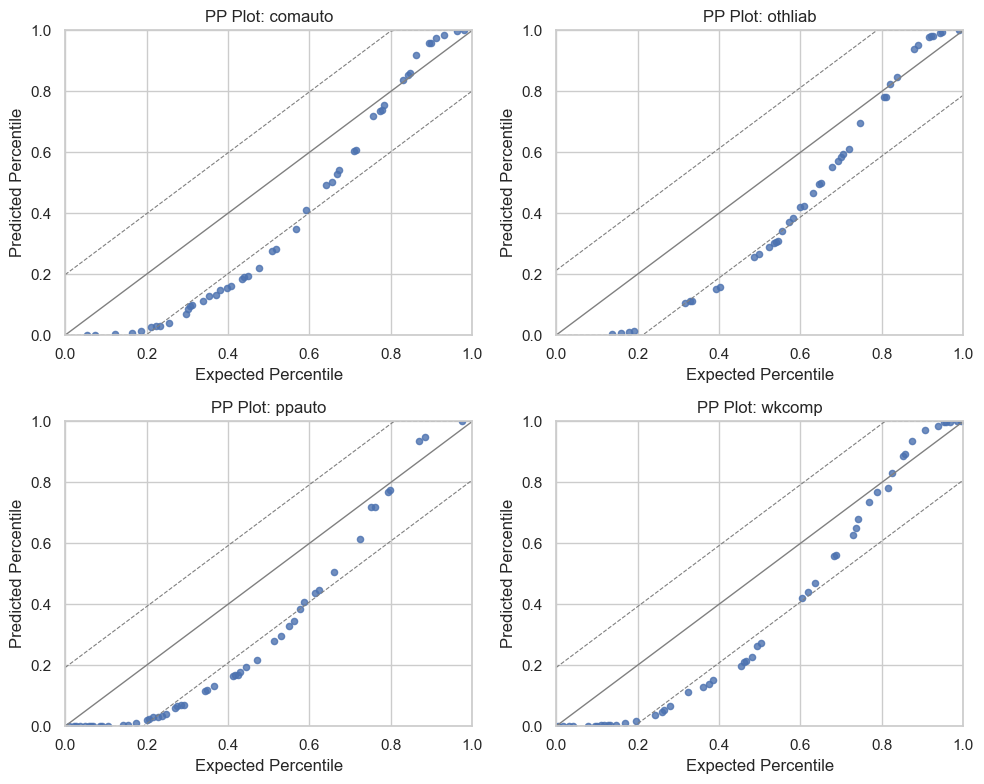

In [6]:
pp_fig = rt.create_pp_plot(mack_results, cv_limits=(0.0, 1.0), by_line=True)

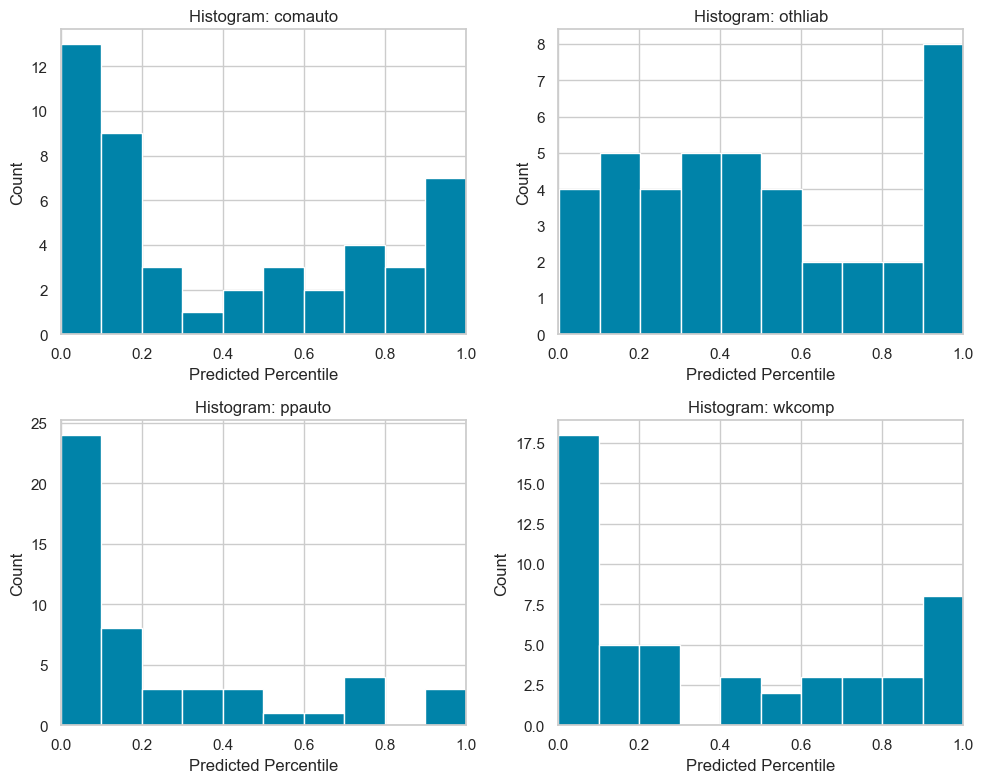

In [7]:
hist_fig = rt.create_histogram_plot(mack_results, cv_limits=(0.0, 1.0), by_line=True, bins=10)